<a href="https://colab.research.google.com/github/iciromaco/RadiShLab/blob/master/S6__%5Btheory_Commentary%5D_Fitting_BezierCurve_to_sample_points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. ベジエ曲線の定義

　有限個の制御点 $ {\bf B_0,B_1,\dots,B_N}$(と、$[0,1]$を定義域とするパラメータ$t$により，次式で定義される曲線をN次のベジエ曲線とよぶ．

$${\bf B}(t) = \sum_{n=0}^{N}{b_{N,n}(t)}{\bf B_n}\tag{1}$$

　ただし、

$$b_{N,n}(t) = _{N}C_n (1-t)^n t^{N-n} \tag{2}$$

で、**バーンスタイン関数**とよばれる。 $_{N}C_n$は$N$個からn個を選ぶ組み合わせの数である．

　バーンスタイン関数に関して、

$$\sum_{n=0}^{N}{b_{N,n}(t)}=\sum_{n=0}^{N}C_n (1-t)^n t^{N-n} = ((1-t) +  t) ^{N} = 1 \tag{3}$$

が成り立つ。すなわち，$N$種のバーンスタイン関数,$𝑛 = 0,1,\dots,𝑁$ の合計は常に１であり，制御点の混合比率を表すという意味で，ブレンディング関数とも呼ばれる．

　３次のベジエ曲線は４つの制御点によって規定されることになる．ベジエ曲線をつなぎ合わせることで，複雑な図形を形作ることができる．

# 2. 点列へのベジエ曲線のあてはめ

<img width="209" alt="atehame" src="https://user-images.githubusercontent.com/24559785/76388680-8904eb80-6361-11ea-8f75-251dfe64fdd8.png">

　輪郭線をベジエ曲線で近似するということは，標本点の集合にもっとも当てはまるベジエ曲線の制御点を見つけるということである．

　あるベジエ曲線と与えられた$M$個の標本点$P_k,k=1,2,\dots,M$とのずれを，次の式で定義し，この値が最小となる曲線を求めることを考えよう．

　$$E = \frac{1}{2}\sum_{k=1}^{M}|{\bf P}_k - {\bf B}(t_k)|^{2} \tag{4}$$

ただし、${\bf B}(t_k)$は、ベジエ曲線上で標本点 ${\bf P_k}$に最も近い点、 すなわち${\bf P_k}$から曲線に下ろした垂線の足で，${\bf B}(t_k)$はその点に対応するベジエ曲線のパラメータである．この値は求めたいベジエ曲線に依存して決まるものであるが，一旦それは忘れてこの値が既知であるとして考察を進める．

　当てはめに用いるベジエ曲線の次数を$N$とすると，求める曲線は$N+1$個の制御点で$(u_k,v_n) : 𝑛 = 0,1,\dots,𝑁$定義される．誤差関数 $E$は制御点の座標の関数であり，これを最小化する制御点の組み合わせがあるとすれば，

$$
\left\{
\begin{array}{l}
\frac{\partial E}{\partial u_n} = 0, n = 0,1,\dots,N \\
\frac{\partial E}{\partial v_n} = 0, n = 0,1,\dots,N 
\end{array}
\right. \tag{5}$$

が成り立つはずである。

　式(1)の近似ベジエ曲線の式を2次元表記で書き直すと、

$${\bf B(t)} = ( B_x(t),B_y(t)) = (\sum_{n = 0}^{N} b_{N,n}(t)u_n,\sum_{n = 0}^{N} b_{N,n}(t)
v_n ) \tag{6}$$

(5) の第一式（$x$成分）に(4)式，(6)式を順に代入して式変形していくと，$n = 0,1,\dots,N$についてそれぞれ，

$$\frac{\partial E}{\partial u_n} = \sum_{k = 1}^{M}\left( \left(B_x(t_k)- x_k\right) \frac{\partial B_x(t_k)}{\partial u_n} \right) \\
= \sum_{k = 1}^{M}\left( \left( B_x(t_k) - x_k\right) b_{N,n}(t_k)\right) \\
= \sum_{k = 1}^{M}\left(\left(\sum_{i = 0}^{N}b_{N,i}(t_k)u_i - x_k\right)b_{N,n}(t_k)\right) \\
 = \sum_{i= 0}^{N}\left(\sum_{k = 0}^{M}b_{N,i}(t_k)b_{N,n}(t_k)\right)u_i - \sum_{k = 1}^{M}x_k b_{N,n}(t_k) = 0 \tag{7}$$

という方程式が得られる. この式は

$$A_{n,0}u_0 + A_{n,1}u_1 + \dots + A_{_n,_N}u_{_N} = B_n \tag{8}$$

ただし，

$$A_{n,i} = \sum_{k=1}^{M} b_{N,i}(t_k)b_{N,n}(t_k),B_n = \sum_{k=1}^{M}b_{N,n}(t_k)\tag{9}$$

と書ける．
パラメータ を固定した場合，$A_{n,i}$,$B_n$ は定数となるので，(8) 式は$N+1$個の変数 の線形方程式である．この方程式は$n = 0,1,\dots,N$について，計$N+1$個作れるので，それらをすべて連立させて解けば，固定したパラメータ の下ではあるが，標本点への最適当てはめのベジエ曲線を得ることができる．（5）の第二式（y成分）についてもまったく同様である．

&copy;2020 Dan, Seiichiro, Osaka Gakuin University



# 標本点の最寄り点のパラメータの推定（紐づけ）

　各標本点から曲線までの最短距離の自乗平均は、曲線が決まれば求められるが、曲線のモデルしか決まっていない場合は解析的には求められない。

　次の２つの方法を考えた。

1. **最短距離法**　各標本点と、暫定的な曲線上の最も近い点の曲線パラメータを紐づける。
2. **等距離法**　各標本点と、暫定的な曲線上のパラメータ区間[0,1]の区分曲線を曲線に沿って等間隔に標本点の数と同じだけ区切り、順序関係に従って標本点と紐づけする。この場合の等間隔とはパラメータが等間隔という意味ではなく、曲線に沿って測った道のりが等間隔という意味であることに注意が必要である。

# 注意すべき点

ベジエ曲線のパラメータ空間において、等間隔に $t_1,t2,\dots,$とパラメータを取った時、$x,y$ の値は等間隔になるわけではない点に注意が必要である。




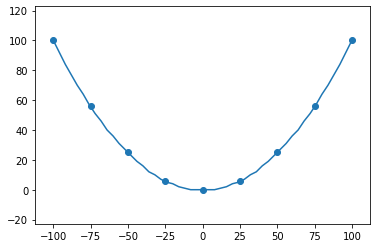

In [0]:
import matplotlib.pyplot as plt
plt.axis('equal')
plt.plot(lin[:,0],lin[:,1])
plt.scatter(po[:,0],po[:,1])
